<a href="https://colab.research.google.com/github/maxashoka3/EDA-Global-Terrorism-Dataset/blob/main/EDA_Global_Terrorism_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Ashokanand Chaudhary**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[Github Link of Project](https://github.com/maxashoka3/EDA-Global-Terrorism-Dataset)

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [6]:
# Import Libraries
import numpy as np
import pandas as pd
from scipy import signal

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import statistics
from statistics import mode

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
# Load Dataset
dataset = pd.read_csv("/content/drive/MyDrive/AlmaBetter/EDA - Global Terrorism Data/Global Terrorism Data.csv",encoding='ISO-8859-1')

### Dataset First View

In [9]:
# Dataset First Look
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
dataset.shape

(181691, 135)

Since there are total of 135 columns in the data
Renaming some columns which we are going to use for analysis

### Selecting & Re-naming required columns

In [11]:
# Renaming the important columns
dataset = dataset.rename(columns = {'iyear':'Year',
                                    'imonth':'Month',
                                    'iday':'Day',
                                    'country_txt':'Country',
                                    'region_txt':'Region',
                                    'provstate':'State',
                                    'city':'City',
                                    'attacktype1_txt':'Attack_type',
                                    'targtype1_txt':'Target_type',
                                    'targsubtype1_txt':'Target_subtype',
                                    'gname':'Gang_name',
                                    'weaptype1_txt':'Weapon_type',
                                    'nkill':'Killed',
                                    'nwound':'Wounded'})


In [12]:
# Checking columns whether they are updated or not
dataset.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [13]:
# Selecting only important column which will be used for the analysis
terror_df = dataset[['Year','Month','Day','Country','Region','State','City',
                      'Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type','Killed','Wounded']]

In [14]:
# Now checking the new dataset
terror_df.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,Killed,Wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,NaN,NaN


In [15]:
# checking its shape
terror_df.shape

(181691, 14)

There are 135 column in the dataset, But we required only 12 columns in the data so created the new dataset named ***terror_df*** and selected only 12 column in the new dataset.

### Dataset Information

In [16]:
# Dataset Info
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   State           181270 non-null  object 
 6   City            181257 non-null  object 
 7   Attack_type     181691 non-null  object 
 8   Target_type     181691 non-null  object 
 9   Target_subtype  171318 non-null  object 
 10  Gang_name       181691 non-null  object 
 11  Weapon_type     181691 non-null  object 
 12  Killed          171378 non-null  float64
 13  Wounded         165380 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 19.4+ MB


#### Duplicate Values

In [17]:
# Dataset Duplicate Value Count 181691
terror_df.duplicated().value_counts()

False    168635
True      13056
dtype: int64

We can clearly see that there are **16133** number of duplicate rows.Though it is the huge number we need to remove because Duplicate rows causes the error and has no use in the EDA

In [18]:
# Removing the duplicate rows
terror_df.drop_duplicates(inplace = True)

In [19]:
# Checking if dataset updated or not
terror_df.duplicated().value_counts()

False    168635
dtype: int64

#### Missing Values/Null Values

In [20]:
# Missing Values/Null Values Count
print(terror_df.isnull().sum())

Year                  0
Month                 0
Day                   0
Country               0
Region                0
State               421
City                424
Attack_type           0
Target_type           0
Target_subtype     9188
Gang_name             0
Weapon_type           0
Killed             9116
Wounded           14854
dtype: int64


Year                  0
Month                 0
Day                   0
Country               0
Region                0
State               421
City                424
Attack_type           0
Target_type           0
Target_subtype     9188
Gang_name             0
Weapon_type           0
Killed             9116
Wounded           14854
dtype: int64


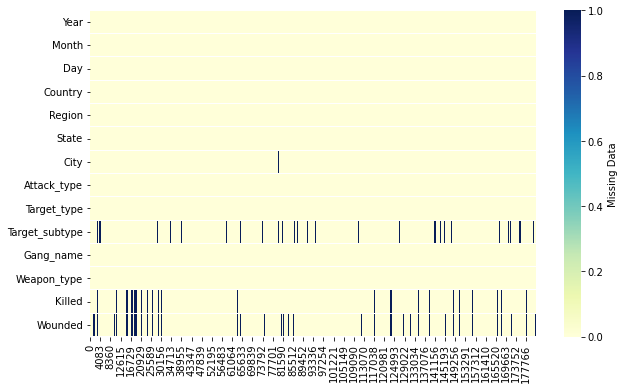

In [21]:
# Visualizing the missing values
print(terror_df.isnull().sum())
plt.figure(figsize=(10,6))
sns.heatmap(terror_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

Heatmap shows it contains null values and these null values will be removed later..


### What did you know about your dataset?

This is The Global Terrorism dataset from which is needed to analyse and explore the possible causes, trends and patterns in the act of terrorism.
In this dataset it has 181691 rows and  135 columns But we selected the important columns and all rows to perform the Exploratory Data Analysis. There are 16133 duplicate rows in the dataset which has been removed from the dataset. Its three columns has null values.They are :
* State
* City
* Target_subtype
 
 

## ***2. Understanding Your Variables***

In [22]:
# Dataset Columns
terror_df.columns.tolist()

['Year',
 'Month',
 'Day',
 'Country',
 'Region',
 'State',
 'City',
 'Attack_type',
 'Target_type',
 'Target_subtype',
 'Gang_name',
 'Weapon_type',
 'Killed',
 'Wounded']

In [23]:
# Dataset Describe
terror_df.describe(include = 'all')

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,Killed,Wounded
count,168635.000000,168635.000000,168635.000000,168635,168635,168214,168211,168635,168635,159447,168635,168635,159519.000000,153781.000000
unique,NaN,NaN,NaN,205,12,2855,36674,9,22,112,3537,12,NaN,NaN
top,NaN,NaN,NaN,Iraq,Middle East & North Africa,Baghdad,Unknown,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Unknown,Explosives,NaN,NaN
freq,NaN,NaN,NaN,22959,47678,7431,8018,79875,40682,11089,78301,84025,NaN,NaN
mean,2003.081893,6.469464,15.526516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.543778,3.358946
std,13.161817,3.390868,8.815249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.932488,37.254276
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000


### Variables Description 

### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.
column_list = terror_df.columns.tolist()
for i in column_list:
  print("\033[1m" + i + "\033[0m")  
  print("Unique values are: \n ",terror_df[i].unique().tolist())
  print("No. of unique values : ", terror_df[i].nunique(),".\n")
  

Year
Unique values are: 
  [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
No. of unique values :  47 .

Month
Unique values are: 
  [7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]
No. of unique values :  13 .

Day
Unique values are: 
  [2, 0, 1, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 4, 7, 16, 17, 18, 23, 24, 5, 29]
No. of unique values :  32 .

Country
Unique values are: 
  ['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan', 'United States', 'Uruguay', 'Italy', 'East Germany (GDR)', 'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)', 'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina', 'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran', 'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragu

Its value has lots of problem which needed to be fixed in the Data Wrangling part

## 3. ***Data Wrangling***

#### Data Wrangling Code

In [25]:
# Write your code to make your dataset analysis ready.
# creating the copy of the current datast 
df = terror_df.copy()


##### Handling null values

In [26]:
# Handling the null values and the unknown values

print(df.isnull().sum())


Year                  0
Month                 0
Day                   0
Country               0
Region                0
State               421
City                424
Attack_type           0
Target_type           0
Target_subtype     9188
Gang_name             0
Weapon_type           0
Killed             9116
Wounded           14854
dtype: int64


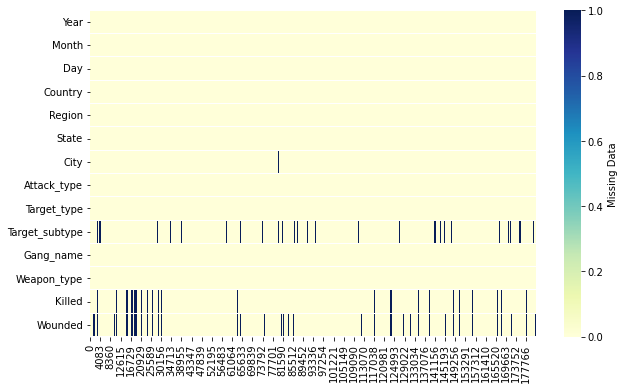

In [27]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(
    df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

Heatmap shows null values and these are clearly the sensetive values so droping wont be solution. So null values are handled separetly.
* State
* City
* Target_subtype
* Killed

In [28]:
# filling null values of city and State as Unknown
df['City'].fillna('Unknown',inplace = True)
df['State'].fillna('Unknown',inplace = True)

In [29]:
 df['Killed'].fillna(value = int(df['Killed'].mean()),inplace = True)

In [30]:
# filling null values of Target_subtype as Others
df['Target_subtype'].fillna('Others',inplace = True)

In [31]:
# filling null vlaues of the  Wounded with the mean
df['Wounded'].fillna(value = int(df['Wounded'].mean()),inplace = True)

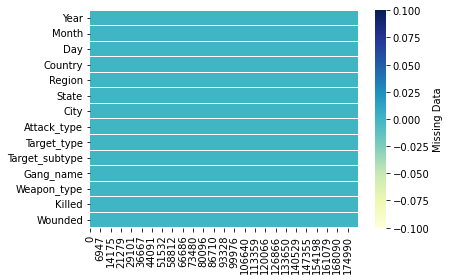

In [32]:
# Visualizing the missing values if any thorugh Heatmap
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

The above Heatmap show absence of null values.

##### Naming properly

In [33]:
# Function to check column properly
def column_check(column):  
  print(column)  
  print("Unique values are: \n ", df[column].unique().tolist())
  print("No. of unique values : ", df[column].nunique(),".\n")
  


In [34]:
column_check('Year')

Year
Unique values are: 
  [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
No. of unique values :  47 .



In [35]:
column_check('Month')

Month
Unique values are: 
  [7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]
No. of unique values :  13 .



In [36]:
#checking the total values with month equals to 0
print(len(df[df['Month'] == 0]))

19


In [37]:
# Replacing the 0 with mode value in the month because it may have some significance in that month
df.loc[df['Month'] == 0,'Month']= mode(df['Month'])


In [38]:
#checking whether it is updated or not
column_check('Month')

Month
Unique values are: 
  [7, 5, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12]
No. of unique values :  12 .



In [39]:
# Checking the unique values of the column Day
column_check("Day")

Day
Unique values are: 
  [2, 0, 1, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 4, 7, 16, 17, 18, 23, 24, 5, 29]
No. of unique values :  32 .



In [40]:
# Checking the length of day equals to the zero
print(len(df[df['Day'] == 0]))

793


We do not have **O** in number in the day, So we will be removing that **Day O** with mode 

In [41]:
# Replacing 0 value with most frequent number
df.loc[df['Day']==0,'Day'] = mode(df['Day'])

In [42]:
# Checking if its updated or not
column_check("Day")

Day
Unique values are: 
  [2, 15, 1, 3, 6, 8, 9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 4, 7, 16, 17, 18, 23, 24, 5, 29]
No. of unique values :  31 .



In [43]:
# Checking the unique values of the column Country
column_check("Country")

Country
Unique values are: 
  ['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan', 'United States', 'Uruguay', 'Italy', 'East Germany (GDR)', 'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)', 'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina', 'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran', 'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua', 'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan', 'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia', 'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait', 'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India', 'France', 'South Vietnam', 'Brunei', 'Zaire', "People's Republic of the Congo", 'Portugal', 'Algeria', 'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus', 'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras', 'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore', 'Botswana', 'Jamaica', 'Chad', 'North Yemen', 'Andorra', 'Syria', 'South Korea', 'Uni

We can see there are many country which have been partition and captured by other like Soviet Union, East Germany & West Germany, west bank and Gaza Strip and soon. So we will not do any thing to these but There is no country as the International so we will take look at this.

In [44]:
#checking the country International
df[df['Country']=='International']

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,Killed,Wounded
74658,2002,10,6,International,Middle East & North Africa,Gulf of Aden,Gulf of Aden,Bombing/Explosion,Maritime,Oil Tanker,Al-Qaida,Explosives,1.0,12.0


We will rename International to Gulf of Aden.


In [45]:
# Renaming International to the Gulf of Aden
df.loc[df['Country']=='International','Country'] = 'Gulf of Aden'

In [46]:
# Checking if its updated or not
df[df['Country']=='Gulf of Aden']

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,Killed,Wounded
74658,2002,10,6,Gulf of Aden,Middle East & North Africa,Gulf of Aden,Gulf of Aden,Bombing/Explosion,Maritime,Oil Tanker,Al-Qaida,Explosives,1.0,12.0


In [47]:
column_check('Region')

Region
Unique values are: 
  ['Central America & Caribbean', 'North America', 'Southeast Asia', 'Western Europe', 'East Asia', 'South America', 'Eastern Europe', 'Sub-Saharan Africa', 'Middle East & North Africa', 'Australasia & Oceania', 'South Asia', 'Central Asia']
No. of unique values :  12 .



In [48]:
# Checking the unique values of State
column_check('State')

State
Unique values are: 
  ['Unknown', 'Federal', 'Tarlac', 'Attica', 'Fukouka', 'Illinois', 'Montevideo', 'California', 'Wisconsin', 'Colorado', 'Lazio', 'Michigan', 'Puerto Rico', 'Berlin', 'New York', 'Washington', 'New Jersey', 'Guatemala', 'Metropolitan Manila', 'Caracas', 'Nebraska', 'Mississippi', 'Ohio', 'Florida', 'Oregon', 'Massachusetts', 'Bavaria', 'Maryland', 'Louisiana', 'Connecticut', 'Hesse', 'Zurich', 'Arizona', 'Khalil', 'Metropolitian Manila', 'Alabama', 'New Mexico', 'Sao Paulo', 'Alexandria', 'Montana', 'District of Columbia', 'Pampanga', 'National', 'Corrientes', 'Buenos Aires', 'Beirut', 'Georgia', 'Texas', 'Dublin', 'Rio Grande do Sul', 'Kansas', 'Missouri', 'Amman', 'Istanbul', 'Pennsylvania', 'Minnesota', 'Iowa', 'Indiana', 'Asuncion', 'North Carolina', 'Oklahoma', 'Idaho', 'Geneva', 'Utah', 'Capiz', 'Lara', 'Tehran', 'Rio de Janeiro', 'Northern Ireland', 'Caldas', 'Managua', 'Pernambuco', 'Navarre', 'North Holland', 'Brussels', 'Tucuman', 'Santa Fe', 'Ankara

In [49]:
# Checking values of the city
column_check('City')

City
Unique values are: 
  ['Santo Domingo', 'Mexico city', 'Unknown', 'Athens', 'Fukouka', 'Cairo', 'Montevideo', 'Oakland', 'Madison', 'Baraboo', 'Denver', 'Rome', 'Detroit', 'Rio Piedras', 'Berlin', 'New York City', 'Rio Grande', 'Seattle', 'Champaign', 'Jersey City', 'Guatemala City', 'Quezon City', 'Caracas', 'South Sioux City', 'West Point', 'Norwalk', 'Coral Gables', 'Bamban', 'Portland', 'Akron', 'Dorado', 'Carolina', 'Boston', 'Whitewater', 'Batavia', 'Munich', 'Ypsilanti', 'Berkeley', 'Eugene', 'San Francisco', 'Buckeystown', 'Covington', 'Cleveland', 'Vallejo', 'Hartford', 'Frankfurt', 'Zurich', 'Ithaca', 'Prairie du Sac', 'Tucson', 'Boulder', 'Hebron', 'Manila', 'Colorado Springs', 'Martinez', 'San Juan', 'Ashville', 'Bridgeport', 'Albuquerque', 'Bel Air', 'Cambridge', 'Sao Paulo', 'Chicago', 'Appleton', 'Alexandria', 'Long Beach', 'Billings', 'San Bernardino', 'Los Angeles', 'Lockland', 'Washington', 'Orlando', 'Angeles', 'Ituzaingo', 'Richmond', 'Buenos Aires', 'Beirut', 

In [50]:
column_check('Attack_type')

Attack_type
Unique values are: 
  ['Assassination', 'Hostage Taking (Kidnapping)', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault', 'Hostage Taking (Barricade Incident)']
No. of unique values :  9 .



Lets try to use the simple name and small name

In [51]:
# Changing the Hostage Taking(Kidnapping) to the Kidnapping and 'Hostage Taking (Barricade Incident)' to the Barricade Incident
df.loc[df['Attack_type'] == 'Hostage Taking (Kidnapping)','Attack_type'] = 'Kidnapping'
df.loc[df['Attack_type'] == 'Hostage Taking (Barricade Incident)','Attack_type'] = 'Barricade Incident'

In [52]:
# checking if its updated or not
df[df['Attack_type'] == 'Barricade Incident']

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,Killed,Wounded
336,1970,6,9,Jordan,Middle East & North Africa,Amman,Amman,Barricade Incident,Business,Hotel/Resort,Popular Front for the Liberation of Palestine ...,Firearms,0.0,0.0
469,1970,8,21,Uruguay,South America,Montevideo,Montevideo,Barricade Incident,Telecommunication,Radio,Tupamaros (Uruguay),Firearms,0.0,0.0
941,1971,7,21,United States,North America,California,San Francisco,Barricade Incident,Business,Bank/Commerce,Black Liberation Army,Firearms,0.0,0.0
1211,1972,3,16,United States,North America,New York,New York City,Barricade Incident,Business,Bank/Commerce,Black Liberation Army,Firearms,0.0,1.0
1570,1972,9,29,United States,North America,New York,New York City,Barricade Incident,Business,Bank/Commerce,Black Liberation Army,Firearms,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180703,2017,11,23,Nigeria,Sub-Saharan Africa,Adamawa,Sabon Gari,Barricade Incident,Private Citizens & Property,Farmer,Boko Haram,Firearms,7.0,0.0
181239,2017,12,11,India,South Asia,Jharkhand,Madhuamilan,Barricade Incident,Business,Construction,People's Liberation Front of India,Firearms,0.0,0.0
181383,2017,12,18,Venezuela,South America,Miranda,San Antonio de los Altos,Barricade Incident,Military,Military Barracks/Base/Headquarters/Checkpost,Unknown,Firearms,0.0,3.0
181615,2017,12,28,India,South Asia,Jharkhand,Pandrasali,Barricade Incident,Business,Construction,Unknown,Firearms,0.0,0.0


In [53]:
df[df['Attack_type'] == 'Kidnapping']

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,Killed,Wounded
1,1970,5,15,Mexico,North America,Federal,Mexico city,Kidnapping,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,0.0
27,1970,1,22,Venezuela,South America,Caracas,Caracas,Kidnapping,Business,Retail/Grocery/Bakery,Armed Forces of National Liberation- Venezuela...,Unknown,0.0,0.0
103,1970,3,3,Spain,Western Europe,Unknown,Unknown,Kidnapping,Government (General),Politician or Political Party Movement/Meeting...,1st of May Group,Unknown,0.0,0.0
112,1970,3,6,Guatemala,Central America & Caribbean,Guatemala,Guatemala City,Kidnapping,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Rebel Armed Forces of Guatemala (FAR),Firearms,0.0,0.0
123,1970,3,11,Brazil,South America,Sao Paulo,Sao Paulo,Kidnapping,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Popular Revolutionary Vanguard (VPR),Unknown,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181616,2017,12,28,Yemen,Middle East & North Africa,Al Hudaydah,Bayt al-Faqiah district,Kidnapping,Private Citizens & Property,Alleged Informant,Houthi extremists (Ansar Allah),Unknown,2.0,3.0
181620,2017,12,28,Afghanistan,South Asia,Wardak,Pul-e-Sukh,Kidnapping,Educational Institution,Teacher/Professor/Instructor,Unknown,Firearms,0.0,0.0
181630,2017,12,28,Philippines,Southeast Asia,North Cotabato,Tuael,Kidnapping,Police,Police Security Forces/Officers,New People's Army (NPA),Firearms,2.0,3.0
181636,2017,12,29,Afghanistan,South Asia,Jawzjan,Darzab district,Kidnapping,Religious Figures/Institutions,Religious Figure,Khorasan Chapter of the Islamic State,Unknown,2.0,3.0


In [54]:
# Checking the unique values of the Target_type
column_check('Target_type')

Target_type
Unique values are: 
  ['Private Citizens & Property', 'Government (Diplomatic)', 'Journalists & Media', 'Police', 'Utilities', 'Military', 'Government (General)', 'Airports & Aircraft', 'Business', 'Educational Institution', 'Violent Political Party', 'Religious Figures/Institutions', 'Unknown', 'Transportation', 'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply', 'Terrorists/Non-State Militia', 'Other', 'Maritime', 'Abortion Related']
No. of unique values :  22 .



In [55]:
#checking the Target_subtype values
column_check('Target_subtype')

Target_subtype
Unique values are: 
  ['Named Civilian', 'Diplomatic Personnel (outside of embassy, consulate)', 'Radio Journalist/Staff/Facility', 'Embassy/Consulate', 'Police Building (headquarters, station, school)', 'Police Security Forces/Officers', 'Electricity', 'Military Recruiting Station/Academy', 'Government Building/Facility/Office', 'Military Barracks/Base/Headquarters/Checkpost', 'Aircraft (not at an airport)', 'Retail/Grocery/Bakery', 'Others', 'Military Personnel (soldiers, troops, officers, forces)', 'School/University/Educational Building', 'Multinational Corporation', 'Party Office/Facility', 'House/Apartment/Residence', 'Race/Ethnicity Identified', 'Judge/Attorney/Court', 'Police Patrol (including vehicles and convoys)', 'Place of Worship', 'Vehicles/Transportation', 'Bus (excluding tourists)', 'Politician or Political Party Movement/Meeting/Rally', 'Hotel/Resort', 'Airport', 'Bank/Commerce', 'Construction', 'Tour Bus/Van', 'Train/Train Tracks/Trolley', 'Religion Ide

In [56]:
column_check('Gang_name')

Gang_name
Unique values are: 
  ['MANO-D', '23rd of September Communist League', 'Unknown', 'Black Nationalists', 'Tupamaros (Uruguay)', "New Year's Gang", 'Weather Underground, Weathermen', 'Left-Wing Militants', 'Armed Commandos of Liberation', 'Commune 1', 'Eritrean Liberation Front', 'Strikers', 'Student Radicals', 'White extremists', 'Armed Forces of National Liberation- Venezuela (FALN)', "New People's Army (NPA)", 'Armed Revolutionary Independence Movement (MIRA)', 'Popular Front for the Liberation of Palestine (PFLP)', 'Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)', '1st of May Group', 'Rebel Armed Forces of Guatemala (FAR)', 'Ku Klux Klan', 'Popular Revolutionary Vanguard (VPR)', 'Revolutionary Force 9', 'Puerto Rican Nationalists', 'Chicano Liberation Front', 'Puerto Rican Resistance Movement', 'Black Panthers', 'Dominican Popular Movement (MPD)', 'Argentine Liberation Front (FAL)', 'Argentine National Organization Movement (MANO)', 'Japanese Red Army (JRA

In [57]:
column_check('Weapon_type')

Weapon_type
Unique values are: 
  ['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical', 'Melee', 'Sabotage Equipment', 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Fake Weapons', 'Radiological', 'Other', 'Biological']
No. of unique values :  12 .



Here in Weapon_type its one of the unique value is : 
**Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'** it is too lengthly so this value is changed to Vehicle and also changing the Unknown to the Other

In [58]:
# Changing big name to Vehicle
df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

In [59]:
# Changing the 'Unknown' to the 'Other
df.loc[df['Weapon_type'] == 'Unknown','Weapon_type'] = 'Other'

In [60]:
# Checking if its updated or not
df['Weapon_type'].unique()

array(['Other', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment', 'Vehicle', 'Fake Weapons',
       'Radiological', 'Biological'], dtype=object)

In [61]:
# Check again
df.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,Killed,Wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Other,1.0,0.0
1,1970,5,15,Mexico,North America,Federal,Mexico city,Kidnapping,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Other,0.0,0.0
2,1970,1,15,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Other,1.0,0.0
3,1970,1,15,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,2.0,3.0
4,1970,1,15,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,2.0,3.0


##### Exploring the Hospot of Terrorism

In [62]:
# Top 10 Country with most number of Terrorism
df['Country'].value_counts()[:10]

Iraq              22959
Pakistan          13551
Afghanistan       12400
India             11443
Colombia           7349
Philippines        6715
United Kingdom     4868
Peru               4843
El Salvador        4181
Somalia            4059
Name: Country, dtype: int64

In [63]:
# Bottom 10 Country with less number of Terrorism
df['Country'].value_counts().tail(10)

New Hebrides           1
South Vietnam          1
North Korea            1
St. Lucia              1
Andorra                1
Gulf of Aden           1
Vatican City           1
Wallis and Futuna      1
Falkland Islands       1
Antigua and Barbuda    1
Name: Country, dtype: int64

In [64]:
# Getting the top of every things
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("Total Number of people died due to the Terrerist Attack are:",df['Killed'].sum())
print("Total Numebr of people wounded due to the Terrorist attaked are:",df['Wounded'].sum())
print("City with the most attacks:",df['City'].value_counts().index[1]) 
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Gang_name'].value_counts().index[1])
print("Most Attack Types:",df['Attack_type'].value_counts().idxmax())


Country with the most attacks: Iraq
Total Number of people died due to the Terrerist Attack are: 424013.0
Total Numebr of people wounded due to the Terrorist attaked are: 561104.0
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [65]:
# Defining Function to get details of terrorist activities of that any country
def Details_country(X):
      country = df[df['Country'] == X].reset_index(drop = True)
      print('Total Number of pople has been killed due to the terrorism is :',country['Killed'].sum())
      print('Total Nummber of Wounded are : ',country['Wounded'].sum())
       # Top most affected State is
      print("\nThe most affected State is ", country['State'].value_counts().idxmax())
      # Top most affected city of Iran
      print("\nThe most affected City is", country['City'].value_counts().idxmax())
      # Higest Attack type 
      print("\nThe higest type of attack is is ", country['Attack_type'].value_counts().idxmax())
      print('\nMost Target is ',country['Target_type'].value_counts().idxmax())
      print('\nMost Exactly Target ',country['Target_subtype'].value_counts().idxmax())
      print("\nGangs Responsible for Most terrerism is ",country['Gang_name'].value_counts().idxmax())
      print("\nMost used weapon is",country['Weapon_type'].value_counts().idxmax())


In [66]:
list_country = ['Iraq','Pakistan','Afghanistan','India','Colombia','Philippines','United Kingdom','El Salvador','Somalia']

In [67]:
for country in list_country:
  print("Details of Terrorism  \t" + country)
  print('**********************************************')
  Details_country(country)
  print("\n-------------------------------------------------------------------")

Details of Terrorism  	Iraq
**********************************************
Total Number of pople has been killed due to the terrorism is : 78918.0
Total Nummber of Wounded are :  136536.0

The most affected State is  Baghdad

The most affected City is Baghdad

The higest type of attack is is  Bombing/Explosion

Most Target is  Private Citizens & Property

Most Exactly Target  Unnamed Civilian/Unspecified

Gangs Responsible for Most terrerism is  Unknown

Most used weapon is Explosives

-------------------------------------------------------------------
Details of Terrorism  	Pakistan
**********************************************
Total Number of pople has been killed due to the terrorism is : 23903.0
Total Nummber of Wounded are :  42963.0

The most affected State is  Balochistan

The most affected City is Karachi

The higest type of attack is is  Bombing/Explosion

Most Target is  Private Citizens & Property

Most Exactly Target  Others

Gangs Responsible for Most terrerism is  Unknow

In [68]:
# Get into the details of the India
Details_country('India')

Total Number of pople has been killed due to the terrorism is : 19547.0
Total Nummber of Wounded are :  29578.0

The most affected State is  Jammu and Kashmir

The most affected City is Srinagar

The higest type of attack is is  Bombing/Explosion

Most Target is  Private Citizens & Property

Most Exactly Target  Police Security Forces/Officers

Gangs Responsible for Most terrerism is  Unknown

Most used weapon is Explosives


In [69]:
# Create Data set for the India
India = df[df['Country'] == 'India'].reset_index(drop = True)

In [70]:
# Top Indian state with number of the terrorism activity
India['State'].value_counts()[:5]

Jammu and Kashmir    2333
Assam                1080
Manipur              1066
Chhattisgarh          969
Punjab                862
Name: State, dtype: int64

Most affected area is Jammu and Kashmir.

In [71]:
# Top Indian city with number of the terrorism activity
India['City'].value_counts()[:5]

Srinagar     594
Unknown      498
Imphal       407
New Delhi    149
Amritsar     137
Name: City, dtype: int64

Jammu and Kashmir city has most number of terrerism activity

In [72]:
# Top 5 Attack type
India['Attack_type'].value_counts()[:5]

Bombing/Explosion                 4584
Armed Assault                     3119
Assassination                     1191
Kidnapping                        1167
Facility/Infrastructure Attack     869
Name: Attack_type, dtype: int64

Most of the terrorist attack by the Bombing/Explosion or by the Armed Assault

In [73]:
# India top 5 Target_type
India['Target_type'].value_counts()[:5]

Private Citizens & Property    2982
Police                         2233
Government (General)           1655
Business                       1068
Military                        911
Name: Target_type, dtype: int64

Most afffected  Target is Private Citizens & proerty and after that police, and Government's General are targetted

In [74]:
# Top 5 Gangs
India['Gang_name'].value_counts()[:5]

Unknown                                           4142
Communist Party of India - Maoist (CPI-Maoist)    1829
Maoists                                           1360
Sikh Extremists                                    659
United Liberation Front of Assam (ULFA)            344
Name: Gang_name, dtype: int64

Most attack are done by the Unknown terrorist groups.

### What all manipulations have you done and insights you found?

**Manupulation** :
* Null values present in the state, City has been imputed by the Unknown values and Target_subtype by Other and Killed and wounded has been filled with the mean of the value.

* The 0 present in the field of the Day and Month are replaced with mode
 Country with the value 

* International has been repalced with the Gulf of Aden
* Attack_type Hostage Taking (Kidnapping) and Hostage Taking (Barricade Incident) have been replaced with the Kidnapping and Barricade Incident repectively
* 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs' has been chaged to 'Vehicle' in Weapon_type

**Insights** :

Its shocking to see that in most of the country's main Target is **Private citizens & property** where they have attacked **Normal Unarmed Civilion** they are attacked with the Bombing or Explosion and in other country milletry personnal and police officer has been attacked.
 * Iraq has been attacked most.
 * Total Number of people died due to the Terrerist Attack are: 424013.0
 * Total Numebr of people wounded due to the Terrorist attaked are: 561104.0
 * City with the most attacks: Baghdad
 * Region with the most attacks: Middle East & North Africa
 * Year with the most attacks: 2014
 * Month with the most attacks: 5
 * Group with the most attacks: Taliban
 * Most Attack Types: Bombing/Explosion.

In india most venerable state is Jammu & kasmir.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Word Cloud i.e City (Univariate)

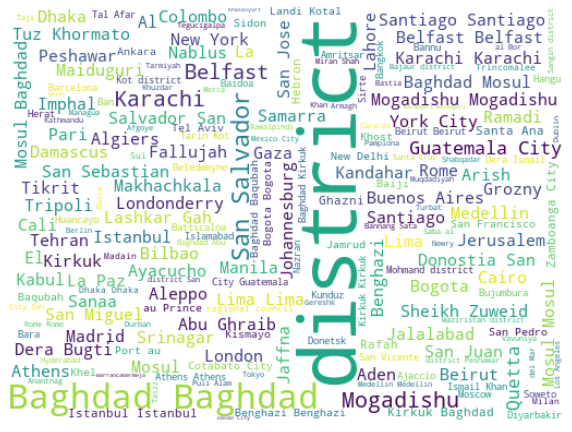

In [75]:
# Chart - 1 visualization code
# Selecting the city except the Unknown
cities = df.loc[df['City'] !='Unknown','City']
plt.subplots(figsize=(10,8))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate('  '.join(cities))
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

We choose this word clouds because these are the visual representation of words that give greater promience to twords that appear more frequently.When using the Mentimeter word cloud generator, the words that are added most frequently by audience members will increase in size dynamically. So cities connected with terrorrism will be  occuring more and have bigger and more bold in text. There are 36674 cities have been attacked. So to get the all the cities in the one frame according to the frequency of the attack. This chart is picked

##### 2. What is/are the insight(s) found from the chart?

From this above chart we can clearly the cities which have more terrorist attack. The cities with most attack are Baghdad,Salvador,Karachi, Magadishu,Pesawar, Istanbul, Lima, kabul and so on.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this gained insights, it can helps the government and International agencies to get give the priority on the security Enchancement, should provide more security personnal & milletery and can put more resrtiction on the use of the arms and ammonition on cities with first sight of Cities name from the clouds of words.

#### Chart - 2 Number of Terrorist Activities each Year.

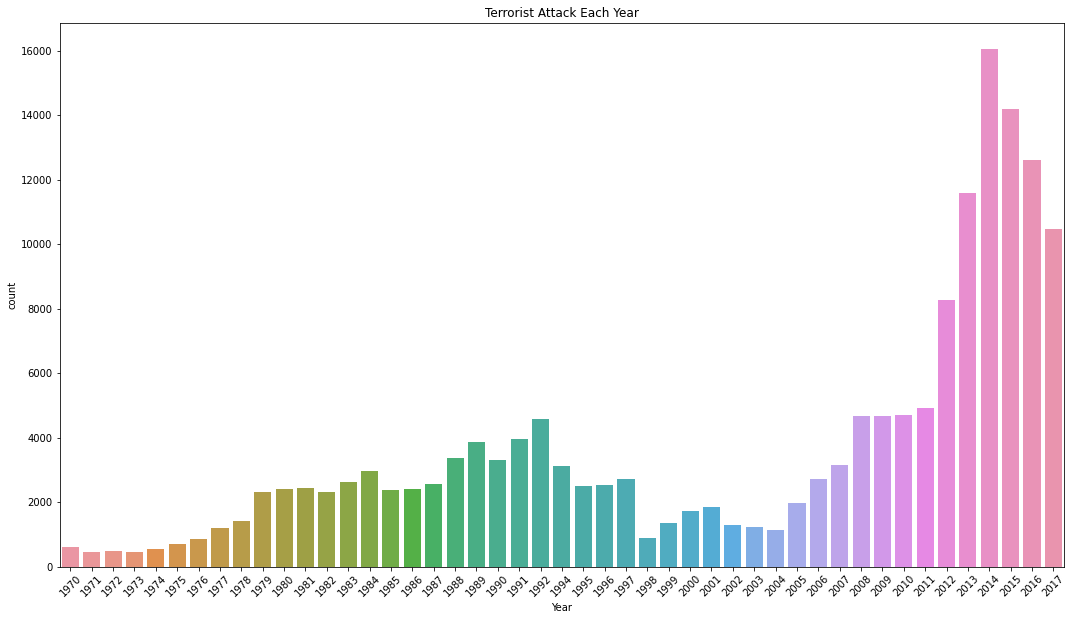

In [90]:
plt.figure(figsize = (18,10))
sns.countplot("Year",data = df)
plt.title('Terrorist Attack Each Year')
plt.xticks(rotation = 45)
plt.show()

##### 1. Why did you pick the specific chart?

Count plot represents the cont of the categorical data with rectangular bars with heights or lengths proportional to the frequency of each variables. Here we have represented number of terrorist attack each year and height of bar is proportional to the number of the attack every year.

##### 2. What is/are the insight(s) found from the chart?

It can seen seen from the bar graph, The number of attack are increasing with as the year elapsed but in  1998 number of attack takes dip significantly but again increases as the year passes. 2014 has the most number of the attack.In 70's has less number of attack than other decades. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Government and International organization should take the terrorism more seriously. They should focus more on security and increase spies network, and should to something so they can reduce this terrorism and should ask question WHY TERRERISM KEEPS ON INCREASING EVEN AFTER ADAPING modern technology and facilities. Because this is a very serious matter as terrorism keep on increasing even after so much effort. As i think Government and differnt organization should take differnt approach to reduce the terrorism.

#### Chart - 3 People Killed Every Year

In [136]:
# Chart - 3 Number of People killed or wounded every Year
Casualty = df.groupby("Year", as_index = False).agg({'Killed':'sum',
                                                              'Wounded':'sum'})

In [152]:
Casualty 

,Year,Killed,Wounded
0,1970,255.0,362.0
1,1971,296.0,508.0
2,1972,632.0,1336.0
3,1973,463.0,1173.0
4,1974,640.0,1530.0
5,1975,894.0,1595.0
6,1976,885.0,1650.0
7,1977,706.0,1136.0
8,1978,1753.0,2158.0
9,1979,2708.0,3574.0


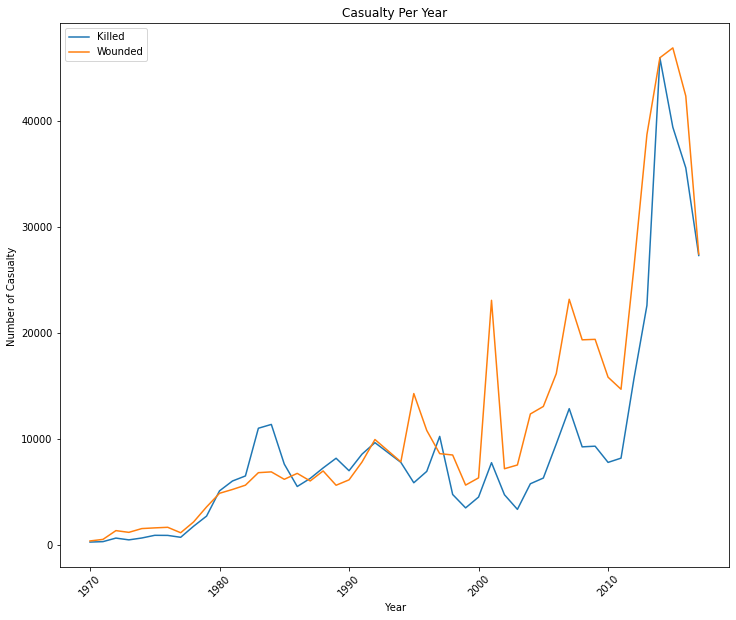

In [151]:
# line plot with multiple lines in the graph
plt.figure(figsize = (12,10))
sns.lineplot(data = Casualty, x = 'Year', y = 'Killed',label = "Killed")
sns.lineplot(data = Casualty, x = 'Year', y = 'Wounded',label = "Wounded")
plt.title('Casualty Per Year')
plt.xlabel(" Year")
plt.ylabel("Number of Casualty ")
plt.xticks(rotation = 45)
plt.show()

##### 1. Why did you pick the specific chart?

Multiple line graph is a line graph that shows more than one variable for comparison trends between two attibutes of a  quality and line graph are very much effective in the time series. So we have choosen this multiple graph, this will show number of wounded and dealth per year in a single graph.

##### 2. What is/are the insight(s) found from the chart?

Line charts represent both Number of wounded and killed per year as both of then are going simultaeously. In the 70's terrorism attack were minimum as the time elapsed the attacked has increased significantly.In 2014 it shows highest number of people killed and in 2015 has the highest number of wounded due to the terrorist attacked. From 2014 the terrorism has increased significantly and after 2015 the terrorism has decrased.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It shows the total number of killed or wounded per year. The attacked could be reduced in some poinnt like 1998 and 2015 but the rest attacked keeps on increasing and Government and other organization should take necssary action to prevent the terrorism.

#### Chart - 4 Year vs Region

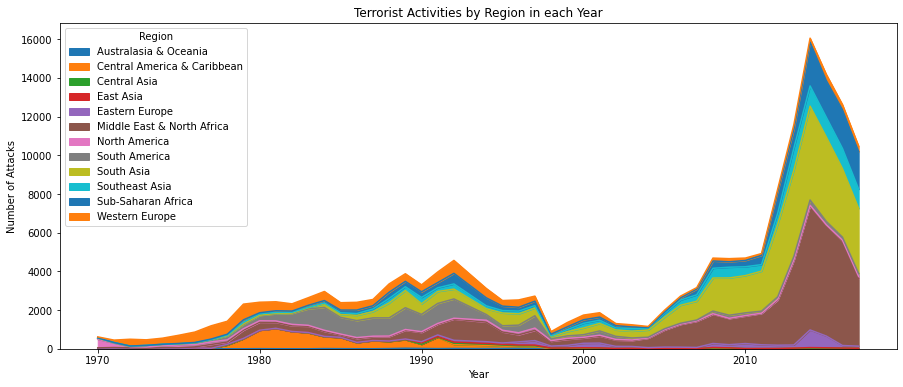

In [163]:
# Chart - 
pd.crosstab(df['Year'], df['Region']).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 
Top 10 countries affected by the terrorist attack.

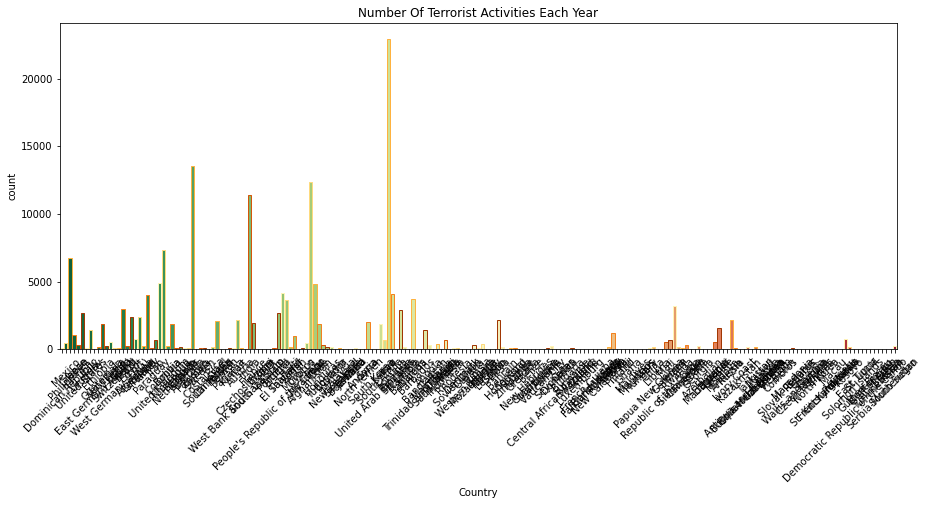

In [174]:
#ploting the all the countries with the count of each attacked
plt.subplots(figsize=(15,6))
sns.countplot('Country',data= df,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr"))
plt.xticks(rotation=45)
plt.title('Count of Country affected')
plt.show()

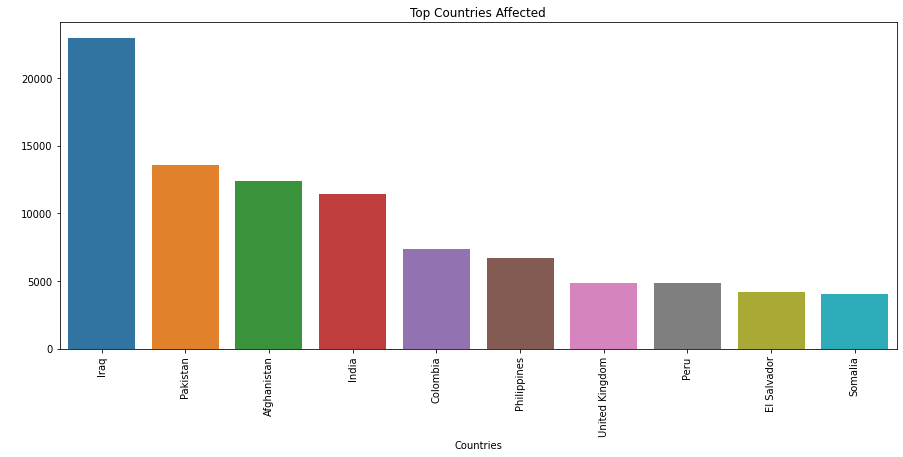

In [171]:
# Chart - 5 visualization code Above chart is quite inreadable so lets take top 10 countries with most attacked
plt.subplots(figsize=(15,6))

sns.barplot( df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values)
sns.color_palette("icefire", as_cmap=True)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel(' ')
plt.xticks(rotation= 90)
plt.show()

##### 1. Why did you pick the specific chart?

It represent the graphical information of the categorical value. and its hieght are proportional to the values that they represent so we need the bar graph to compare the different countries.

##### 2. What is/are the insight(s) found from the chart?

Bar char shows the top ten countries affected by the terrorism. Most affected country is Iraq.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Its shows the path to build security parameter and focus more on the specific country from where it can be stopped. As it tells us to take measures  and priority of reform in security system and assigning more army in the top ten countries :- Iraq, Pakistan, Afganistan, India, Colombia, Philippines, United States, Peru, El salvador and Somalia

#### Chart - 6 Top 10 Weapon Used

In [175]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type', 'Killed', 'Wounded'],
      dtype='object')

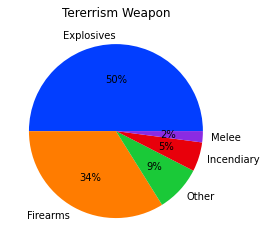

In [187]:
#getting top 5 the labels
#plt.subplots(figsize=(10,10))
labels=  df['Weapon_type'].value_counts()[:5].index
#getting the 5 values
data_values = df['Weapon_type'].value_counts()[:5].values
colors = sns.color_palette('bright')[0:5]
#pie-chart
plt.pie(data_values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Tererrism Weapon")
plt.show()

##### 1. Why did you pick the specific chart?




The pie chart is a sperical figures with colored wedges that contains all the data. The distribution of the numerical information determines the size every segment in a pie chart. It is a tool for analyzing the numerical values and its compositions. So Pie-chart here will show the composition of the different weapon according to their use in the the terrerism

##### 2. What is/are the insight(s) found from the chart?

50% of the weapon used are Explosive. And second used weapon is Firearms and least used weapon is Melee and other contribute 9 percent to the terrorist attack

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Governemnt should constraint the use of exploding material and should keep tracking the Firearms. Only if these deadly weapon are controlled and tracked frequently can reduce the terrorism in the World.

#### Chart - 7

In [81]:
# Chart - 7 Countries 


##### 1. Why did you pick the specific chart?

1.   List item
2.   List item



Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [82]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [83]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [84]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [85]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [86]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [87]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [88]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [89]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***